# League of Legends 2019 World Championship Analysis

A logistical regression model will be created to determine the most important variables in a victory. The datasets are from Kaggle: https://www.kaggle.com/ilyadziamidovich/league-of-legends-world-championship-2019. 


# Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import f_regression

In [2]:
player_data = pd.read_csv('players.csv')
player_data

,Unnamed: 0,date,side,position,player,team,champion,ban1,ban2,ban3,...,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,0,43740.28615,Blue,Top,Evi,DetonatioN FocusMe,Gnar,Qiyana,Gangplank,Akali,...,-798,4530,5051,-521,76,90,-14,116,122,-6
1,1,43740.28615,Blue,Jungle,Steal,DetonatioN FocusMe,Ekko,Qiyana,Gangplank,Akali,...,-1366,3679,3928,-249,60,64,-4,88,105,-17
2,2,43740.28615,Blue,Middle,Ceros,DetonatioN FocusMe,Nocturne,Qiyana,Gangplank,Akali,...,-629,4751,4533,218,88,85,3,131,150,-19
3,3,43740.28615,Blue,ADC,Yutapon,DetonatioN FocusMe,Lucian,Qiyana,Gangplank,Akali,...,-1829,3526,3532,-6,87,76,11,119,134,-15
4,4,43740.28615,Blue,Support,Gaeng,DetonatioN FocusMe,Thresh,Qiyana,Gangplank,Akali,...,-1156,2731,2376,355,4,3,1,6,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,1421,43779.39314,Red,Top,Wunder,G2 Esports,Ryze,Pantheon,Qiyana,Rakan,...,692,4330,4611,-281,88,65,23,153,105,48
1186,1422,43779.39314,Red,Jungle,Jankos,G2 Esports,Jarvan IV,Pantheon,Qiyana,Rakan,...,279,2926,2699,227,48,55,-7,80,81,-1
1187,1423,43779.39314,Red,Middle,Caps,G2 Esports,Veigar,Pantheon,Qiyana,Rakan,...,-169,4711,4430,281,89,78,11,129,122,7
1188,1424,43779.39314,Red,ADC,Perkz,G2 Esports,Ezreal,Pantheon,Qiyana,Rakan,...,-1495,3194,3887,-693,71,90,-19,125,151,-26


In [3]:
champion_data = pd.read_csv('champions.csv')
champion_data

,Unnamed: 0,champion,sum_total,win_total,lose_total,winrate_total,sum_blue_side,win_blue_side,lose_blue_side,winrate_blue_side,...,winrate_30_35_min,matches_35_40_min,win_lose_35_40_min,winrate_35_40_min,matches_40_45_min,win_lose_40_45_min,winrate_40_45_min,matches_more_45_min,win_lose_more_45_min,winrate_more_45_min
0,1,Kai'Sa,71,37,34,52%,30,15,15,50%,...,46%,11,7-Apr,36%,5,2-Mar,60%,1,Jan-00,100%
1,2,Lee Sin,58,30,28,52%,21,11,10,52%,...,45%,10,4-Jun,60%,8,3-May,63%,1,0-1,0%
2,3,Xayah,57,35,22,61%,33,21,12,64%,...,70%,9,6-Mar,33%,5,3-Feb,40%,2,Feb-00,100%
3,4,Nautilus,52,28,24,54%,27,17,10,63%,...,47%,11,4-Jul,64%,5,2-Mar,60%,2,Feb-00,100%
4,5,Gragas,49,32,17,65%,26,16,10,62%,...,59%,7,1-Jun,86%,6,Jun-00,100%,2,1-Jan,50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Viktor,1,0,1,0%,1,0,1,0%,...,0%,0,0-0,0%,0,0-0,0%,0,0-0,0%
94,95,Volibear,1,0,1,0%,1,0,1,0%,...,0%,0,0-0,0%,0,0-0,0%,0,0-0,0%
95,96,Xin Zhao,1,0,1,0%,0,0,0,0%,...,0%,0,0-0,0%,0,0-0,0%,0,0-0,0%
96,97,Ziggs,1,0,1,0%,0,0,0,0%,...,0%,0,0-0,0%,0,0-0,0%,1,0-1,0%


In [4]:
#pd.options.display.max_rows = 999
#pd.options.display.max_columns = 999
raw_data = pd.merge(left=player_data,right=champion_data,how='left',left_on='champion',right_on='champion')
raw_data

,Unnamed: 0_x,date,side,position,player,team,champion,ban1,ban2,ban3,...,winrate_30_35_min,matches_35_40_min,win_lose_35_40_min,winrate_35_40_min,matches_40_45_min,win_lose_40_45_min,winrate_40_45_min,matches_more_45_min,win_lose_more_45_min,winrate_more_45_min
0,0,43740.28615,Blue,Top,Evi,DetonatioN FocusMe,Gnar,Qiyana,Gangplank,Akali,...,50%,4.0,Apr-00,100%,2.0,1-Jan,50%,1.0,0-1,0%
1,1,43740.28615,Blue,Jungle,Steal,DetonatioN FocusMe,Ekko,Qiyana,Gangplank,Akali,...,0%,3.0,0-3,0%,0.0,0-0,0%,0.0,0-0,0%
2,2,43740.28615,Blue,Middle,Ceros,DetonatioN FocusMe,Nocturne,Qiyana,Gangplank,Akali,...,50%,2.0,1-Jan,50%,2.0,0-2,0%,1.0,0-1,0%
3,3,43740.28615,Blue,ADC,Yutapon,DetonatioN FocusMe,Lucian,Qiyana,Gangplank,Akali,...,50%,5.0,4-Jan,20%,1.0,Jan-00,100%,0.0,0-0,0%
4,4,43740.28615,Blue,Support,Gaeng,DetonatioN FocusMe,Thresh,Qiyana,Gangplank,Akali,...,43%,4.0,1-Mar,75%,5.0,3-Feb,40%,1.0,0-1,0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,1421,43779.39314,Red,Top,Wunder,G2 Esports,Ryze,Pantheon,Qiyana,Rakan,...,64%,7.0,2-May,71%,2.0,1-Jan,50%,1.0,0-1,0%
1186,1422,43779.39314,Red,Jungle,Jankos,G2 Esports,Jarvan IV,Pantheon,Qiyana,Rakan,...,40%,7.0,5-Feb,29%,1.0,Jan-00,100%,0.0,0-0,0%
1187,1423,43779.39314,Red,Middle,Caps,G2 Esports,Veigar,Pantheon,Qiyana,Rakan,...,0%,1.0,Jan-00,100%,0.0,0-0,0%,0.0,0-0,0%
1188,1424,43779.39314,Red,ADC,Perkz,G2 Esports,Ezreal,Pantheon,Qiyana,Rakan,...,17%,7.0,3-Apr,57%,3.0,Mar-00,100%,1.0,0-1,0%


In [5]:
data = raw_data.copy()
data.columns.values

array(['Unnamed: 0_x', 'date', 'side', 'position', 'player', 'team',
       'champion', 'ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'gamelength',
       'result', 'k', 'd', 'a', 'teamkills', 'teamdeaths', 'doubles',
       'triples', 'quadras', 'pentas', 'fb', 'fbassist', 'fbvictim',
       'fbtime', 'kpm', 'okpm', 'ckpm', 'fd', 'fdtime', 'teamdragkills',
       'oppdragkills', 'elementals', 'oppelementals', 'firedrakes',
       'waterdrakes', 'earthdrakes', 'airdrakes', 'elders', 'oppelders',
       'herald', 'heraldtime', 'ft', 'fttime', 'firstmidouter',
       'firsttothreetowers', 'teamtowerkills', 'opptowerkills', 'fbaron',
       'fbarontime', 'teambaronkills', 'oppbaronkills', 'dmgtochamps',
       'dmgtochampsperminute', 'dmgshare', 'earnedgoldshare', 'wards',
       'wpm', 'wardshare', 'wardkills', 'wcpm', 'visionwards',
       'visionwardbuys', 'visiblewardclearrate', 'invisiblewardclearrate',
       'totalgold', 'earnedgpm', 'goldspent', 'gspd', 'minionkills',
       'monsterkil

In [6]:
data

,Unnamed: 0_x,date,side,position,player,team,champion,ban1,ban2,ban3,...,winrate_30_35_min,matches_35_40_min,win_lose_35_40_min,winrate_35_40_min,matches_40_45_min,win_lose_40_45_min,winrate_40_45_min,matches_more_45_min,win_lose_more_45_min,winrate_more_45_min
0,0,43740.28615,Blue,Top,Evi,DetonatioN FocusMe,Gnar,Qiyana,Gangplank,Akali,...,50%,4.0,Apr-00,100%,2.0,1-Jan,50%,1.0,0-1,0%
1,1,43740.28615,Blue,Jungle,Steal,DetonatioN FocusMe,Ekko,Qiyana,Gangplank,Akali,...,0%,3.0,0-3,0%,0.0,0-0,0%,0.0,0-0,0%
2,2,43740.28615,Blue,Middle,Ceros,DetonatioN FocusMe,Nocturne,Qiyana,Gangplank,Akali,...,50%,2.0,1-Jan,50%,2.0,0-2,0%,1.0,0-1,0%
3,3,43740.28615,Blue,ADC,Yutapon,DetonatioN FocusMe,Lucian,Qiyana,Gangplank,Akali,...,50%,5.0,4-Jan,20%,1.0,Jan-00,100%,0.0,0-0,0%
4,4,43740.28615,Blue,Support,Gaeng,DetonatioN FocusMe,Thresh,Qiyana,Gangplank,Akali,...,43%,4.0,1-Mar,75%,5.0,3-Feb,40%,1.0,0-1,0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,1421,43779.39314,Red,Top,Wunder,G2 Esports,Ryze,Pantheon,Qiyana,Rakan,...,64%,7.0,2-May,71%,2.0,1-Jan,50%,1.0,0-1,0%
1186,1422,43779.39314,Red,Jungle,Jankos,G2 Esports,Jarvan IV,Pantheon,Qiyana,Rakan,...,40%,7.0,5-Feb,29%,1.0,Jan-00,100%,0.0,0-0,0%
1187,1423,43779.39314,Red,Middle,Caps,G2 Esports,Veigar,Pantheon,Qiyana,Rakan,...,0%,1.0,Jan-00,100%,0.0,0-0,0%,0.0,0-0,0%
1188,1424,43779.39314,Red,ADC,Perkz,G2 Esports,Ezreal,Pantheon,Qiyana,Rakan,...,17%,7.0,3-Apr,57%,3.0,Mar-00,100%,1.0,0-1,0%


In [7]:
pd.options.display.max_rows = 122
data.dtypes

Unnamed: 0_x                 int64
date                       float64
side                        object
position                    object
player                      object
team                        object
champion                    object
ban1                        object
ban2                        object
ban3                        object
ban4                        object
ban5                        object
gamelength                 float64
result                       int64
k                            int64
d                            int64
a                            int64
teamkills                    int64
teamdeaths                   int64
doubles                      int64
triples                      int64
quadras                      int64
pentas                       int64
fb                           int64
fbassist                     int64
fbvictim                     int64
fbtime                     float64
kpm                        float64
okpm                

In [8]:
#Dropping unwanted data columns
data = data.drop(['Unnamed: 0_x', 'date', 'ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'fbassist', 'fbvictim',
       'fbtime', 'kpm', 'okpm', 'ckpm', 'fd', 'fdtime',
       'Unnamed: 0_y',
       'matches_less_25_min', 'win_lose_less_25_min',
       'winrate_less_25_min', 'matches_25_to_30_min',
       'win_lose_25_to_30_min', 'winrate_25_30_min', 'matches_30_35_min',
       'win_lose_30_35_min', 'winrate_30_35_min', 'matches_35_40_min',
       'win_lose_35_40_min', 'winrate_35_40_min', 'matches_40_45_min',
       'win_lose_40_45_min', 'winrate_40_45_min', 'matches_more_45_min',
       'win_lose_more_45_min', 'winrate_more_45_min'], axis=1)


In [9]:
data['winrate_total'] = data['winrate_total'].str.replace('%', '').astype(float)

In [10]:
data['winrate_total'] = data['winrate_total'].replace('NaN',0)

In [11]:
data['winrate_total'].fillna(0,inplace=True)

In [12]:
data['winrate_total']

0       61.0
1       20.0
2       25.0
3       31.0
4       46.0
        ... 
1185    61.0
1186    39.0
1187    50.0
1188    44.0
1189    54.0
Name: winrate_total, Length: 1190, dtype: float64

In [13]:
data.isnull().sum()

side                          0
position                      0
player                        0
team                          0
champion                      0
gamelength                    0
result                        0
k                             0
d                             0
a                             0
teamkills                     0
teamdeaths                    0
doubles                       0
triples                       0
quadras                       0
pentas                        0
fb                            0
teamdragkills                 0
oppdragkills                  0
elementals                    0
oppelementals                 0
firedrakes                    0
waterdrakes                   0
earthdrakes                   0
airdrakes                     0
elders                        0
oppelders                     0
herald                        0
heraldtime                 1190
ft                            0
fttime                        0
firstmid

In [14]:
#pd.options.display.max_rows = 9999
pd.options.display.max_columns = 999
data

,side,position,player,team,champion,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,teamdragkills,oppdragkills,elementals,oppelementals,firedrakes,waterdrakes,earthdrakes,airdrakes,elders,oppelders,herald,heraldtime,ft,fttime,firstmidouter,firsttothreetowers,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15,sum_total,win_total,lose_total,winrate_total,sum_blue_side,win_blue_side,lose_blue_side,winrate_blue_side,sum_red_side,win_red_side,lose_red_side,winrate_red_side
0,Blue,Top,Evi,DetonatioN FocusMe,Gnar,26.533333,0,0,4,4,7,22,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,NaN,0,13.588567,0,0,1,10,0.0,23.779817,0,1,11588,436.733668,0.312067,0.206844,11,0.414573,0.105769,4,0.150754,4,6,,,8407,184.059799,8300,-0.151448,180,8,4,1,7.085427,3078,3440,-362,4670,5468,-798,4530,5051,-521,76,90,-14,116,122,-6,18.0,11.0,7.0,61.0,8.0,7.0,1.0,88%,10.0,4.0,6.0,40%
1,Blue,Jungle,Steal,DetonatioN FocusMe,Ekko,26.533333,0,1,4,5,7,22,0,0,0,0,0,1,2,1,2,0,0,0,1,0,0,0,NaN,0,13.588567,0,0,1,10,0.0,23.779817,0,1,7925,298.680904,0.213422,0.166862,24,0.904523,0.230769,8,0.301508,11,13,,,7463,148.481910,7360,-0.296789,35,96,76,0,4.937186,3684,4055,-371,4912,6278,-1366,3679,3928,-249,60,64,-4,88,105,-17,5.0,1.0,4.0,20.0,3.0,0.0,3.0,0%,2.0,1.0,1.0,50%
2,Blue,Middle,Ceros,DetonatioN FocusMe,Nocturne,26.533333,0,1,5,6,7,22,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,NaN,0,13.588567,0,0,1,10,0.0,23.779817,0,1,7557,284.811558,0.203512,0.210106,13,0.489950,0.125000,1,0.037688,6,7,,,8484,186.961809,7700,-0.281729,186,6,4,0,7.236181,3926,3569,357,5487,6116,-629,4751,4533,218,88,85,3,131,150,-19,12.0,3.0,9.0,25.0,3.0,0.0,3.0,0%,9.0,3.0,6.0,33%
3,Blue,ADC,Yutapon,DetonatioN FocusMe,Lucian,26.533333,0,3,4,1,7,22,1,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,NaN,0,13.588567,0,0,1,10,0.0,23.779817,0,1,7369,277.726131,0.198449,0.300743,9,0.339196,0.086538,7,0.263819,3,4,,,10624,267.615075,10150,-0.215385,219,20,20,0,9.007538,3579,3969,-390,5313,7142,-1829,3526,3532,-6,87,76,11,119,134,-15,16.0,5.0,11.0,31.0,11.0,4.0,7.0,36%,5.0,1.0,4.0,20%
4,Blue,Support,Gaeng,DetonatioN FocusMe,Thresh,26.533333,0,2,5,2,7,22,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,NaN,0,13.588567,0,0,1,10,0.0,23.779817,0,1,2694,101.532663,0.072550,0.115445,47,1.771357,0.451923,8,0.301508,13,14,,,6249,102.728141,5450,-0.296875,12,2,2,0,0.527638,2088,2394,-306,3163,4319,-1156,2731,2376,355,4,3,1,6,5,1,35.0,16.0,19.0,46.0,18.0,10.0,8.0,56%,17.0,6.0,11.0,35%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,Red,Top,Wunder,G2 Esports,Ryze,30.366667,0,1,3,4,8,10,0,0,0,0,0,2,3,0,1,0,0,0,0,0,0,0,NaN,0,7.764867,1,0,1,7,0.0,23.078600,0,2,12393,408.111965,0.260971,0.236303,15,0.493963,0.113636,3,0.098793,5,5,,,10844,225.626345,8425,-0.086097,238,28,28,0,8.759605,3528,3066,462,5478,4786,692,4330,4611,-281,88,65,23,153,105,48,36.0,22.0,14.0,61.0,21.0,13.0,8.0,62%,15.0,9.0,6.0,60%
1186,Red,Jungle,Jankos,G2 Esports,Jarvan IV,30.366667,0,1,2,5,8,10,0,0,0,0,1,2,3,1,2,1,0,0,0,0,0,0,NaN,0,7.764867,1,0,1,7,0.0,23.078600,0,2,4456,146.739846,0.093834,0.170739,36,1.185510,0.272727,19,0.625686,14,15,,,8943,163.024808,8825,-0.008463,26,112,73,18,4.544457,2819,3083,-264,4691,4412,279,2926,2699,227,48,55,-7,80,81,-1,18.0,7.0,11.0,39.0,9.0,3.0,6.0,33%,9.0,4.0,5.0,44%
1187,Red,Middle,Caps,G2 Esports,Veigar,30.366667

In [15]:
data.describe(include='all')

,side,position,player,team,champion,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,teamdragkills,oppdragkills,elementals,oppelementals,firedrakes,waterdrakes,earthdrakes,airdrakes,elders,oppelders,herald,heraldtime,ft,fttime,firstmidouter,firsttothreetowers,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15,sum_total,win_total,lose_total,winrate_total,sum_blue_side,win_blue_side,lose_blue_side,winrate_blue_side,sum_red_side,win_red_side,lose_red_side,winrate_red_side
count,1190,1190,1190,1190,1190,1190.000000,1190.00000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.00000,0.0,1190.00000,1190.000000,1190.00000,1190.00000,1190.000000,1190.000000,1150.000000,1150.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190,1190,1190.000000,1190.000000,1190.000000,1.190000e+03,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.00000,1190.000000,1190.000000,1190.000000,1183.000000,1183.000000,1183.000000,1190.000000,1183.000000,1183.000000,1183.000000,1183,1183.000000,1183.000000,1183.000000,1183
unique,2,5,127,24,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,NaN,NaN,NaN,25
top,Red,Top,Humanoid,Splyce,Kai'Sa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50%,NaN,NaN,NaN,50%
freq,595,238,20,100,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1190,1190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,197,NaN,NaN,NaN,137
mean,NaN,NaN,NaN,NaN,NaN,33.292857,0.50000,2.648739,2.656303,5.694958,13.243697,13.281513,0.263025,0.049580,0.005882,0.000840,0.100000,2.226891,2.226891,0.421008,0.421008,0.105042,0.108403,0.111765,0.095798,0.024370,0.024370,0.50000,NaN,0.50000,13.764616,0.50000,0.50000,6.121849,6.121849,0.500000,25.725158,0.710084,0.710084,11749.713445,344.609222,0.200000,0.200000,25.113445,0.748227,0.200000,10.786555,0.318726,8.531933,9.180672,NaN,NaN,12044.324370,230.367537,11166.260504,7.813544e-19,173.599160,39.546218,25.627731,3.849580,6.417069,3141.971429,3141.971429,0.000000,4968.373950,4968.373950,0.000000,3663.179832,3663.179832,0.000000,62.232773,62.232773,0.00000,98.593277,98.593277,0.000000,29.361792,15.546069,13.815723,49.690756,14.729501,8.109890,6.619611,NaN,14.632291,7.436179,7.196112,NaN
std,NaN,NaN,NaN,NaN,NaN,6.436371,0.50021,2.442815,1.816296,3.923176,6.606145,6.587746,0.570271,0.235737,0.076503,0.028989,0.300126,1.509360,1.509360,0.893898,0.893898,0.373502,0.383661,0.362376,0.363470,0.154259,0.

In [16]:
data.dtypes

side                        object
position                    object
player                      object
team                        object
champion                    object
gamelength                 float64
result                       int64
k                            int64
d                            int64
a                            int64
teamkills                    int64
teamdeaths                   int64
doubles                      int64
triples                      int64
quadras                      int64
pentas                       int64
fb                           int64
teamdragkills                int64
oppdragkills                 int64
elementals                   int64
oppelementals                int64
firedrakes                   int64
waterdrakes                  int64
earthdrakes                  int64
airdrakes                    int64
elders                       int64
oppelders                    int64
herald                       int64
heraldtime          

In [17]:
#Checking for missing data
data.isnull().sum()

side                          0
position                      0
player                        0
team                          0
champion                      0
gamelength                    0
result                        0
k                             0
d                             0
a                             0
teamkills                     0
teamdeaths                    0
doubles                       0
triples                       0
quadras                       0
pentas                        0
fb                            0
teamdragkills                 0
oppdragkills                  0
elementals                    0
oppelementals                 0
firedrakes                    0
waterdrakes                   0
earthdrakes                   0
airdrakes                     0
elders                        0
oppelders                     0
herald                        0
heraldtime                 1190
ft                            0
fttime                        0
firstmid

In [18]:
df_null = data.isna().mean().round(4)*100
df_null

side                         0.00
position                     0.00
player                       0.00
team                         0.00
champion                     0.00
gamelength                   0.00
result                       0.00
k                            0.00
d                            0.00
a                            0.00
teamkills                    0.00
teamdeaths                   0.00
doubles                      0.00
triples                      0.00
quadras                      0.00
pentas                       0.00
fb                           0.00
teamdragkills                0.00
oppdragkills                 0.00
elementals                   0.00
oppelementals                0.00
firedrakes                   0.00
waterdrakes                  0.00
earthdrakes                  0.00
airdrakes                    0.00
elders                       0.00
oppelders                    0.00
herald                       0.00
heraldtime                 100.00
ft            

In [19]:
#Heraldtime is completely missing so it will be dropped. fbaron and all other columns with null values are very small portion of data so it will also be dropped
data_clean = data.copy()
data_clean = data.drop(['gamelength', 'k', 'd', 'a','heraldtime','fbaron',
       'fbarontime','sum_total', 'win_total', 'lose_total',
       'sum_blue_side', 'win_blue_side', 'lose_blue_side',
       'winrate_blue_side', 'sum_red_side', 'win_red_side',
       'lose_red_side', 'winrate_red_side','oppdragkills','oppelders','opptowerkills','oppbaronkills','earnedgpm',
       'goldspent', 'gspd', 'minionkills', 'monsterkills','dmgtochamps','dmgshare',
       'earnedgoldshare','wards','wardshare','oppgoldat10','oppgoldat15','oppxpat10', 'oppcsat10', 'oppcsat15',
                       'teamdeaths', 'doubles', 'triples', 'quadras',
       'pentas','oppelementals','ft', 'fttime','wardkills', 'wcpm', 'visionwards', 'visionwardbuys','monsterkillsownjungle', 'monsterkillsenemyjungle',
         'goldat10', 'goldat15', 'xpat10',
       'csat10', 'csat15','gdat10','xpdat10', 'csdat10','totalgold','cspm','teamtowerkills','csdat15','fb','firstmidouter','elementals'],axis=1)
data_clean

,side,position,player,team,champion,result,teamkills,teamdragkills,firedrakes,waterdrakes,earthdrakes,airdrakes,elders,herald,firsttothreetowers,teambaronkills,dmgtochampsperminute,wpm,visiblewardclearrate,invisiblewardclearrate,gdat15,winrate_total
0,Blue,Top,Evi,DetonatioN FocusMe,Gnar,0,7,1,0,0,0,0,0,0,0,0,436.733668,0.414573,,,-798,61.0
1,Blue,Jungle,Steal,DetonatioN FocusMe,Ekko,0,7,1,0,0,0,1,0,0,0,0,298.680904,0.904523,,,-1366,20.0
2,Blue,Middle,Ceros,DetonatioN FocusMe,Nocturne,0,7,1,0,0,0,0,0,0,0,0,284.811558,0.489950,,,-629,25.0
3,Blue,ADC,Yutapon,DetonatioN FocusMe,Lucian,0,7,1,0,0,0,0,0,0,0,0,277.726131,0.339196,,,-1829,31.0
4,Blue,Support,Gaeng,DetonatioN FocusMe,Thresh,0,7,1,0,0,0,0,0,0,0,0,101.532663,1.771357,,,-1156,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,Red,Top,Wunder,G2 Esports,Ryze,0,8,2,0,0,0,0,0,0,0,0,408.111965,0.493963,,,692,61.0
1186,Red,Jungle,Jankos,G2 Esports,Jarvan IV,0,8,2,1,0,0,0,0,0,0,0,146.739846,1.185510,,,279,39.0
1187,Red,Middle,Caps,G2 Esports,Veigar,0,8,2,0,0,0,0,0,0,0,0,196.136114,0.461032,,,-169,50.0
1188,Red,ADC,Perkz,G2 Esports,Ezreal,0,8,2,0,0,1,0,0,0,0,0,713.315038,0.526894,,,-1495,44.0


In [20]:
#Separating numerical data to visualize
num_col = data_clean.select_dtypes(exclude = ['object']).columns
data_clean[num_col].columns.values

array(['result', 'teamkills', 'teamdragkills', 'firedrakes',
       'waterdrakes', 'earthdrakes', 'airdrakes', 'elders', 'herald',
       'firsttothreetowers', 'teambaronkills', 'dmgtochampsperminute',
       'wpm', 'gdat15', 'winrate_total'], dtype=object)

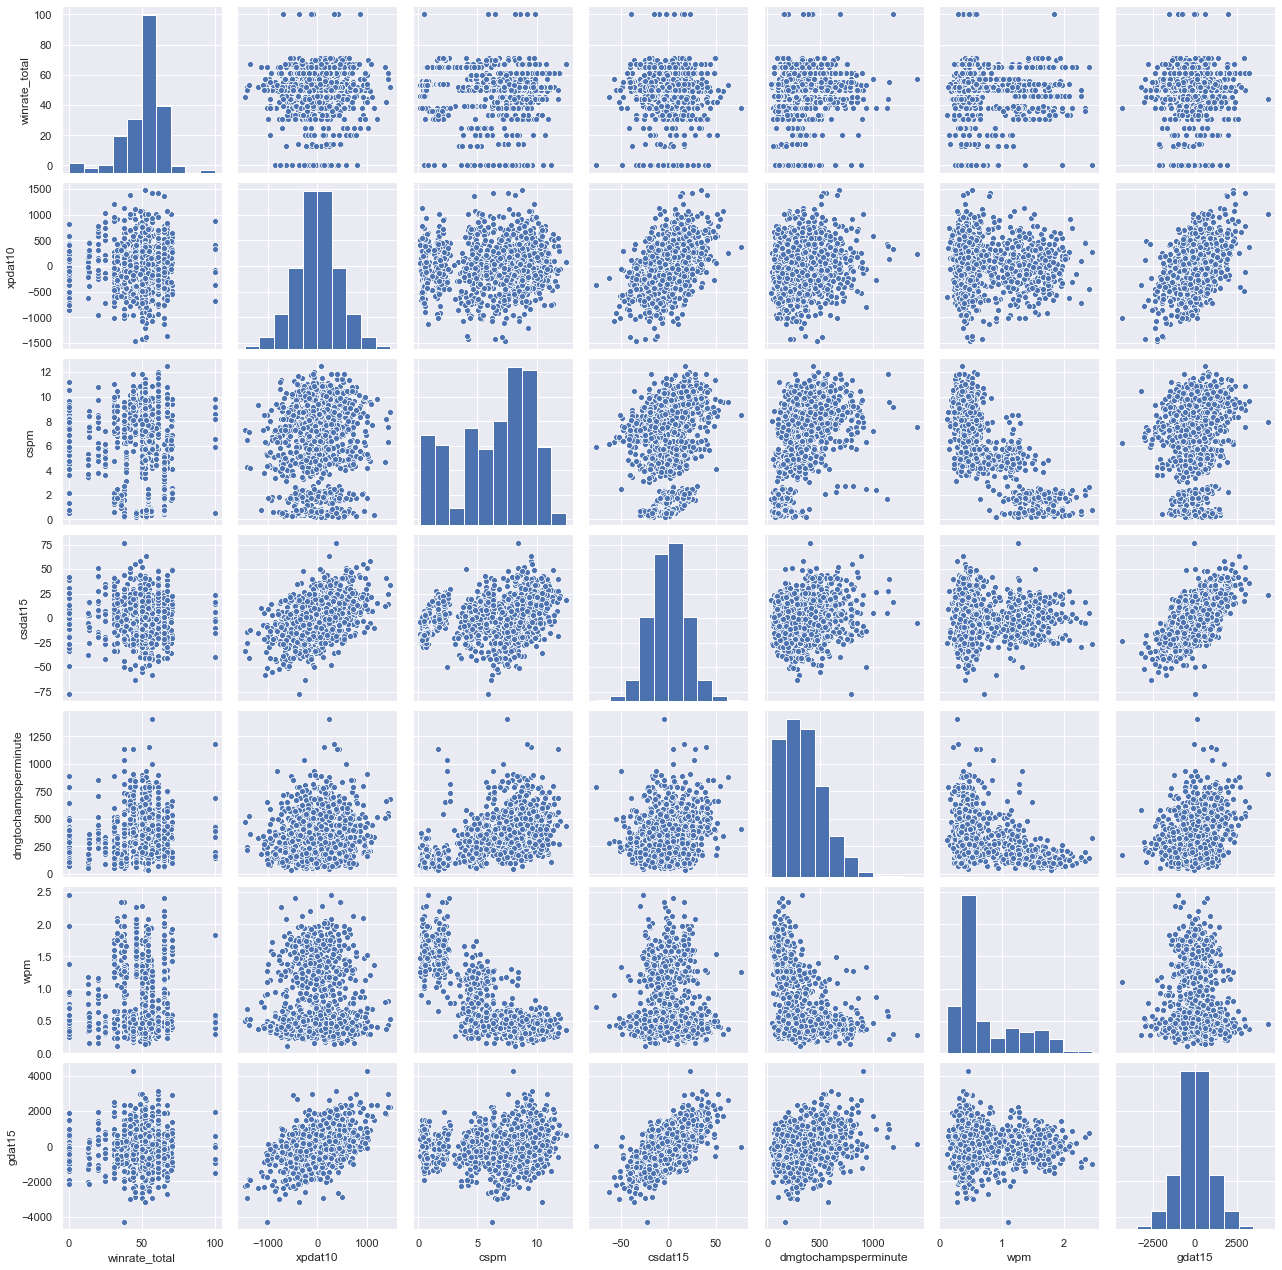

In [21]:
sns.pairplot(data[['winrate_total','xpdat10','cspm','csdat15','dmgtochampsperminute',
       'wpm', 'gdat15']])

In [22]:
#Independent (desired) variables scaled
cols = ['xpdat10','cspm','csdat15','dmgtochampsperminute',
       'wpm', 'gdat15']
data_scaled = data.copy()
data_scaled[cols] = preprocessing.scale(data_scaled[cols])
data_scaled = data_scaled[cols]
data_scaled['result'] = data['result']
data_scaled

,xpdat10,cspm,csdat15,dmgtochampsperminute,wpm,gdat15,result
0,-1.199231,0.210166,-0.314789,0.464609,-0.669876,-0.832322,0
1,-0.573145,-0.465352,-0.891903,-0.231629,0.313793,-1.424752,0
2,0.501790,0.257571,-0.996833,-0.301576,-0.518542,-0.656053,0
3,-0.013811,0.814578,-0.786973,-0.337310,-0.821210,-1.907665,0
4,0.817135,-1.851943,0.052465,-1.225901,2.054130,-1.205719,0
...,...,...,...,...,...,...,...
1185,-0.646802,0.736615,2.518315,0.320262,-0.510486,0.721763,0
1186,0.522506,-0.588846,-0.052465,-0.997909,0.877930,0.291000,0
1187,0.646802,0.436315,0.367254,-0.748790,-0.576601,-0.176269,0
1188,-1.595139,0.850522,-1.364087,1.859483,-0.444371,-1.559300,0


In [23]:
cols2 = ['teamkills','teamdragkills', 'firedrakes', 'waterdrakes',
       'earthdrakes', 'airdrakes', 'elders', 'herald',
       'firsttothreetowers', 'teambaronkills']
data_objectives = data.copy()
data_objectives = data_objectives[cols2]
data_objectives['result'] = data['result']
data_objectives

,teamkills,teamdragkills,firedrakes,waterdrakes,earthdrakes,airdrakes,elders,herald,firsttothreetowers,teambaronkills,result
0,7,1,0,0,0,0,0,0,0,0,0
1,7,1,0,0,0,1,0,0,0,0,0
2,7,1,0,0,0,0,0,0,0,0,0
3,7,1,0,0,0,0,0,0,0,0,0
4,7,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1185,8,2,0,0,0,0,0,0,0,0,0
1186,8,2,1,0,0,0,0,0,0,0,0
1187,8,2,0,0,0,0,0,0,0,0,0
1188,8,2,0,0,1,0,0,0,0,0,0


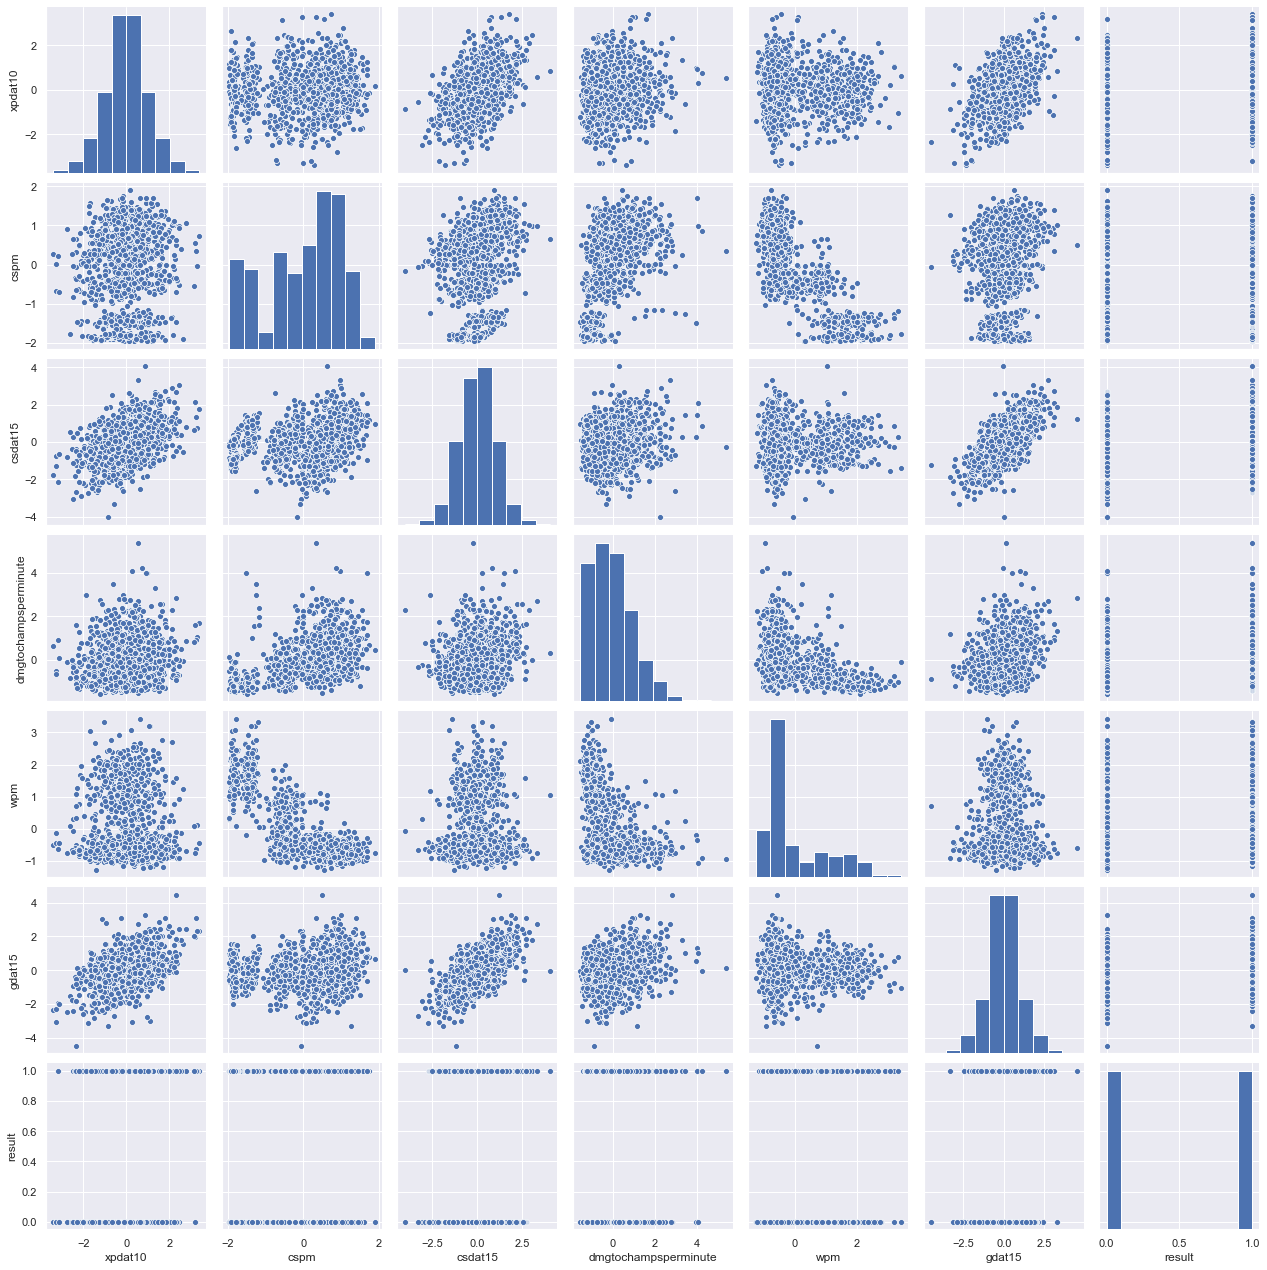

In [24]:
sns.pairplot(data_scaled)

<AxesSubplot:>

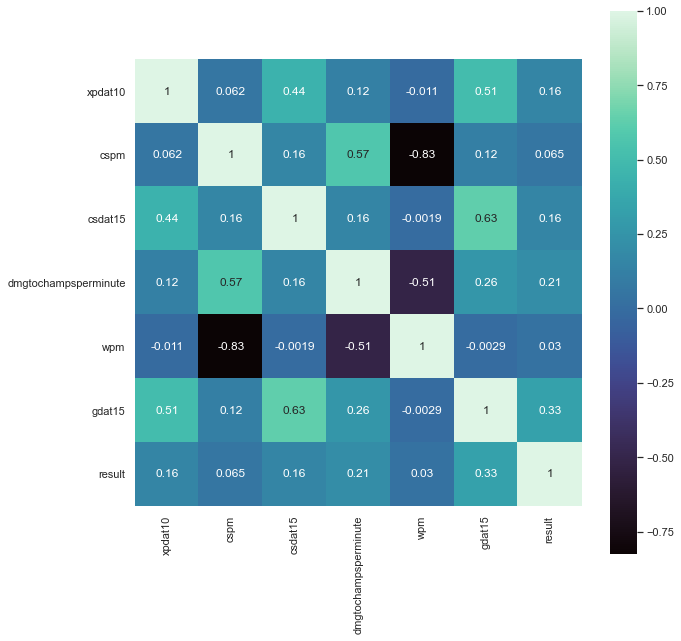

In [25]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(data_scaled.corr(),annot=True,square=True,cmap='mako')

The heatmap above observed individual player/team performance statistics. These statistics include player mechanics and laning stats. It is clear that there are not any strong relationship between laning stats and the outcome of the game.

<AxesSubplot:>

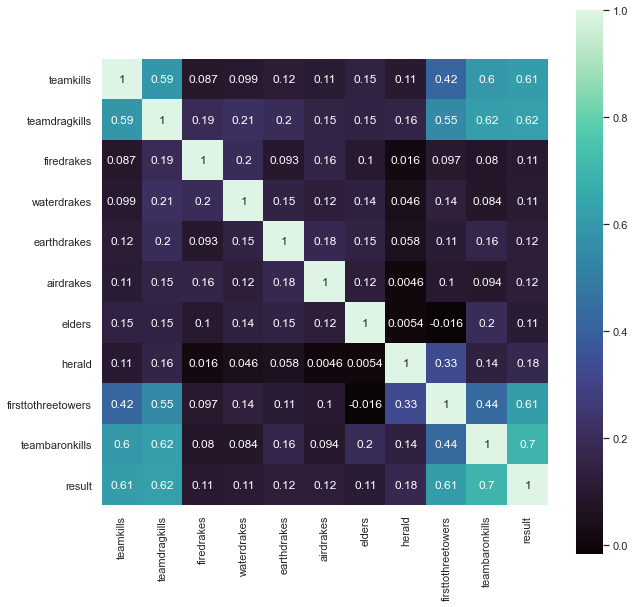

In [26]:
f=plt.figure(figsize=(10,10))
sns.heatmap(data_objectives.corr(),annot=True,square=True,cmap='mako')

The heatmap above observed objective control. Objective control is important in games because it gives teams certain buffs and gold. It is clear that objective control is positively correlated with the outcome of a game, especially team kills, towers, dragon, and baron control.

# Declaring dependent and independent variables

In [27]:
data_clean.columns.values

array(['side', 'position', 'player', 'team', 'champion', 'result',
       'teamkills', 'teamdragkills', 'firedrakes', 'waterdrakes',
       'earthdrakes', 'airdrakes', 'elders', 'herald',
       'firsttothreetowers', 'teambaronkills', 'dmgtochampsperminute',
       'wpm', 'visiblewardclearrate', 'invisiblewardclearrate', 'gdat15',
       'winrate_total'], dtype=object)

In [45]:
desired_variables = ['teamkills', 'teamdragkills', 'firedrakes', 'waterdrakes', 'earthdrakes',
       'airdrakes', 'elders', 'firsttothreetowers',
       'teambaronkills']
y = data_clean['result']
x1 = data_clean[desired_variables]

,teamkills,teamdragkills,firedrakes,waterdrakes,earthdrakes,airdrakes,elders,firsttothreetowers,teambaronkills
0,7,1,0,0,0,0,0,0,0
1,7,1,0,0,0,1,0,0,0
2,7,1,0,0,0,0,0,0,0
3,7,1,0,0,0,0,0,0,0
4,7,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1185,8,2,0,0,0,0,0,0,0
1186,8,2,1,0,0,0,0,0,0
1187,8,2,0,0,0,0,0,0,0
1188,8,2,0,0,1,0,0,0,0


In [29]:
#Scaling data
scaler = preprocessing.StandardScaler()
x1 = scaler.fit_transform(x1)

In [30]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.270371
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 result   No. Observations:                 1190
Model:                          Logit   Df Residuals:                     1180
Method:                           MLE   Df Model:                            9
Date:                Sun, 13 Sep 2020   Pseudo R-squ.:                  0.6099
Time:                        07:18:41   Log-Likelihood:                -321.74
converged:                       True   LL-Null:                       -824.85
Covariance Type:            nonrobust   LLR p-value:                7.903e-211
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1906      0.109     -1.743      0.081      -0.405       0.024
x1             0.8996      0.141      6.400      0.000       0.624       1.175
x2             0.3960      0.153      2.583      0.010       0.096       0.697
x3             0.0587      0.098      0.597      0.551      -0.134       0.252
x4            -0.0603      0.098     -0.613      0.540      -0.253       0.132
x5            -0.1383      0.095     -1.459      0.145      -0.324       0.047
x6             0.0863      0.107      0.805      0.421      -0.124       0.296
x7             0.1243      0.129      0.966      0.334      -0.128       0.376
x8             1.1323      0.118      9.617      0.000       0.902       1.363
x9             1.5060      0.139     10.830      0.000       1.233       1.779
==============================================================================
"""

In [31]:
results_log.pred_table()

array([[526.,  69.],
       [ 50., 545.]])

# Interpretation

In [32]:
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted Defeat','Predicted Victory']
cm_df = cm_df.rename(index={0:'Actual Defeat',1:'Actual Victory'})
cm_df

,Predicted Defeat,Predicted Victory
Actual Defeat,526.0,69.0
Actual Victory,50.0,545.0


In [33]:
cm = np.array(cm_df)
accuracy = ((cm[0,0]+cm[1,1])/cm.sum())*100
accuracy

90.0

# Train Test Split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=0.2,random_state=42)

In [35]:
x_train

array([[-0.64265646, -0.81319698, -0.2813539 , ..., -0.15804577,
        -1.        , -0.95712695],
       [ 0.56884641, -0.15038574, -0.2813539 , ..., -0.15804577,
        -1.        ,  0.39077964],
       [ 1.47747356,  1.17523673, -0.2813539 , ..., -0.15804577,
         1.        ,  0.39077964],
       ...,
       [-0.94553217, -0.15038574, -0.2813539 , ..., -0.15804577,
         1.        , -0.95712695],
       [-1.24840789, -0.15038574, -0.2813539 , ..., -0.15804577,
        -1.        , -0.95712695],
       [-0.4912186 , -0.15038574,  2.39713523, ..., -0.15804577,
        -1.        , -0.95712695]])

In [36]:
test_actual = y_test
test_data = x_test
test_data = sm.add_constant(test_data)
#test_data = test_data[x1.columns.values]
test_data

array([[ 1.        ,  0.72028427,  1.17523673, ..., -0.15804577,
         1.        ,  0.39077964],
       [ 1.        , -0.03690502,  1.17523673, ..., -0.15804577,
        -1.        ,  1.73868623],
       [ 1.        , -0.33978074,  0.51242549, ..., -0.15804577,
         1.        ,  0.39077964],
       ...,
       [ 1.        ,  1.78034927,  1.17523673, ..., -0.15804577,
        -1.        ,  0.39077964],
       [ 1.        ,  0.41740855, -0.15038574, ..., -0.15804577,
        -1.        ,  0.39077964],
       [ 1.        , -0.03690502, -1.47600821, ..., -0.15804577,
        -1.        , -0.95712695]])

In [37]:
def confusion_matrix(data,actual_values,model):
    pred_values = model.predict(data)
    bins = np.array([0,0.5,1])
    cm = np.histogram2d(actual_values,pred_values,bins=bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    return cm

def accuracy(data,actual_values,model):
    pred_values = model.predict(data)
    bins = np.array([0,0.5,1])
    cm = np.histogram2d(actual_values,pred_values,bins=bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    return accuracy


In [38]:
cm_2 = confusion_matrix(test_data,test_actual,results_log)
cm_2

array([[121.,  13.],
       [  8.,  96.]])

In [39]:
cm_df2 = pd.DataFrame(cm_2)
cm_df2.columns = ['Predicted 0', 'Predicted 1']
cm_df2 = cm_df2.rename(index = {0:'Actual 0',1:'Actual 1'})
cm_df2

,Predicted 0,Predicted 1
Actual 0,121.0,13.0
Actual 1,8.0,96.0


In [40]:
accuracy2 = accuracy(test_data,test_actual,results_log)
accuracy2

0.9117647058823529

# Conclusion
This logistical regression model has an accuracy of approximately 97% in predicting game result using the chosen independent variables. Splitting up the data, the testing accuracy is also approximately 97%. The results are expected as Baron kills and Towers destroyed correlate greatly to a victory. With Baron, teams are able to siege effectively and overwhelm the opponents. Number of towers destroyed are expected to increase once the base is open. However, there are some variables that have a higher p-value than 0.05, and therefore is insignificant. It is also interesting that the dragon with the highest odds of victory is Air Drake.


In [41]:
reg = LinearRegression()
reg.fit(x1,y)

LinearRegression()

In [42]:
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

adj_r2(x1,y)

0.6377672598657664

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = data_clean[desired_variables].columns
vif['VIF'] = [variance_inflation_factor(x1,i) for i in range(x1.shape[1])]
vif['VIF'] = vif['VIF']
vif

,Features,VIF
0,teamkills,1.795814
1,teamdragkills,2.209703
2,firedrakes,1.087911
3,waterdrakes,1.109977
4,earthdrakes,1.090261
5,airdrakes,1.078969
6,elders,1.106419
7,firsttothreetowers,1.509931
8,teambaronkills,1.953188


In [44]:
reg_summary = vif.copy()
reg_summary['Coefficients'] = reg.coef_
reg_summary

,Features,VIF,Coefficients
0,teamkills,1.795814,0.096509
1,teamdragkills,2.209703,0.053994
2,firedrakes,1.087911,0.004355
3,waterdrakes,1.109977,-0.005321
4,earthdrakes,1.090261,-0.010965
5,airdrakes,1.078969,0.011625
6,elders,1.106419,-0.000235
7,firsttothreetowers,1.509931,0.153519
8,teambaronkills,1.953188,0.191083


Using logistic regression earlier, objectives are clearly more important in securing a victory. Therefore, a multiple linear regression is performed to determine which objectives should be prioritized. It is clear that taking the first three towers should be focused on in the early game. Baron control should then be prioritized in order to end out the game. These two factors have the highest coefficients in the model.